<a href="https://colab.research.google.com/github/Sepehr2001/NMA-computational-Neuroscience-project-2022/blob/main/NMA_Project_summer_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About the notebook

This notebook pertains to the 'Kottu' pod project (Neuromatch Academy 2022)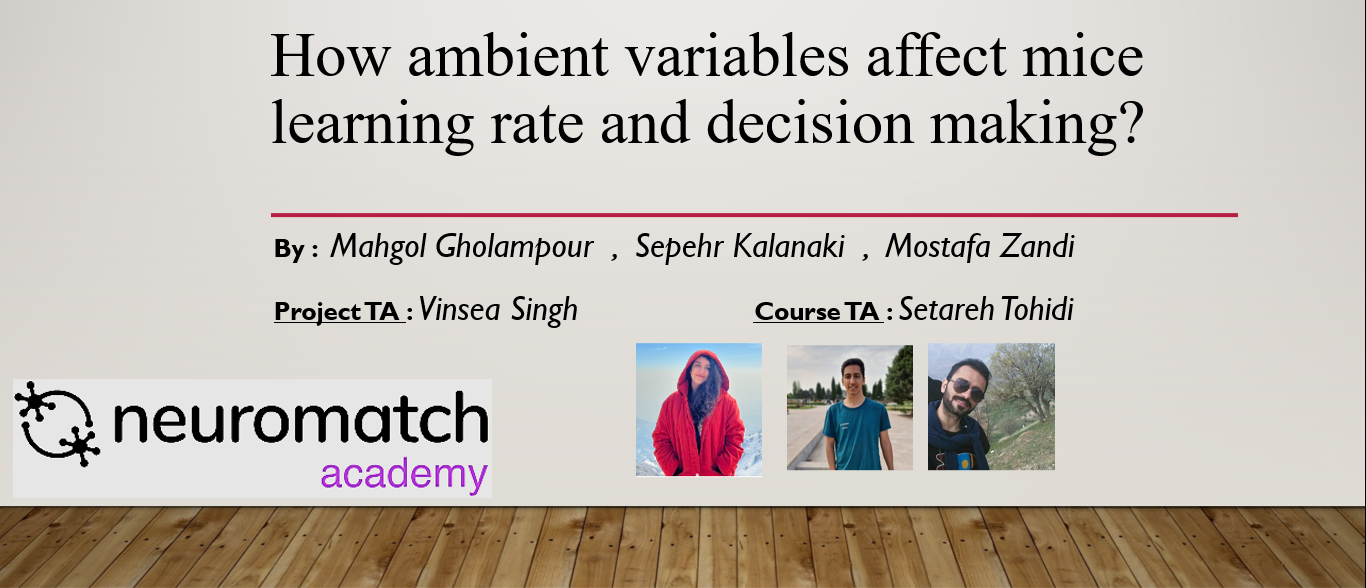

# **Members' Roles**


*  *Mahgol*  : Created the abstract and powerpoint slides
*   *Sepehr*  : Created this notebook
*   Mostafa : Created the models

## Loading the IBL dataset

In [ ]:
!pip install --quiet nma-ibl
!wget https://github.com/vathes/nma-ibl/raw/master/uuids_trained1.npy

--2022-09-19 08:11:26--  https://github.com/vathes/nma-ibl/raw/master/uuids_trained1.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/datajoint-company/nma-ibl/raw/master/uuids_trained1.npy [following]
--2022-09-19 08:11:26--  https://github.com/datajoint-company/nma-ibl/raw/master/uuids_trained1.npy
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/datajoint-company/nma-ibl/master/uuids_trained1.npy [following]
--2022-09-19 08:11:26--  https://raw.githubusercontent.com/datajoint-company/nma-ibl/master/uuids_trained1.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... co

## Standard packages

In [ ]:
# some standard packages
import numpy as np
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import warnings
from termcolor import colored
import math
from numpy import nan
from google.colab import files
warnings.filterwarnings("ignore")

## Extracting data using DataJoint
[DataJoint](https://datajoint.io) -- the framework in which the pipeline has been developed.

In [ ]:
# Import Datajoint in the notebook
import datajoint as dj

### Access the data

In [ ]:
dj.config['database.host'] = 'datajoint-public.internationalbrainlab.org'
dj.config['database.user'] = 'ibl-public'
dj.config['database.password'] = 'ibl-public'
dj.conn() # explicitly verify that the connection to database can be established

[2022-09-19 08:11:28,206][INFO]: Connecting ibl-public@datajoint-public.internationalbrainlab.org:3306
INFO:datajoint:Connecting ibl-public@datajoint-public.internationalbrainlab.org:3306
[2022-09-19 08:11:28,270][INFO]: Connected ibl-public@datajoint-public.internationalbrainlab.org:3306
INFO:datajoint:Connected ibl-public@datajoint-public.internationalbrainlab.org:3306


DataJoint connection (connected) ibl-public@datajoint-public.internationalbrainlab.org:3306

In [ ]:
from nma_ibl import reference, subject, behavior_analyses, behavior
from nma_ibl.paper_behavior_functions import (query_subjects, seaborn_style,
                                              group_colors, institution_map, seaborn_style)

In [ ]:
seaborn_style()
pal = group_colors()
institution_map, col_names = institution_map()
col_names = col_names[:-1]

<Figure size 432x288 with 0 Axes>

These are the 101 subjects that they have done experiment on and their performances are available.
My aim is to sort the data in the following way:

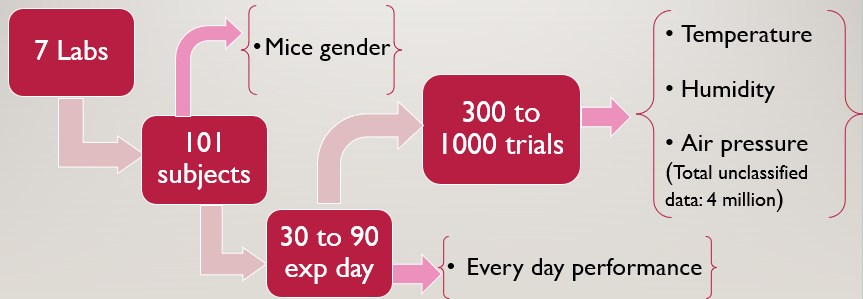

In [ ]:
uuids = np.load('uuids_trained1.npy', allow_pickle=True)
subjects = behavior.AmbientSensorData  & [{'subject_uuid': uuid} for uuid in uuids]

### Define functions

In [ ]:
def build_matrix_3d(a, b, c):
    lst = [[ [0 for col in range(a)] for col in range(b)] for row in range(c)]
    return lst

def build_matrix_2d(rows, cols):
    matrix = []
    for r in range(0, rows):
        matrix.append([0 for c in range(0, cols)])
    return matrix

lab_Inst  =   ['UCL'      , 'CCU'      , 'CSHL'         , 'NYU'        , 'Princeton', 'SWC'           , 'Berkeley']
lab_names =   ['cortexlab', 'mainenlab', 'churchlandlab', 'angelakilab', 'wittenlab', 'mrsicflogellab', 'danlab']

lab_uuid_days        =   build_matrix_3d(len(lab_Inst), 21, 40)
lab_uuidsuccesday    =   build_matrix_2d(len(lab_Inst),40)
lab_uuid             =   build_matrix_2d(len(lab_Inst),21)

lab_uuid_temp        =   build_matrix_3d(len(lab_Inst), 21, 126)
lab_uuid_hum         =   build_matrix_3d(len(lab_Inst), 21, 126)
lab_uuid_press       =   build_matrix_3d(len(lab_Inst), 21, 126)

lab_uuid_performance =   build_matrix_3d(len(lab_Inst), 21, 50)
lab_uuidsex          =   build_matrix_2d(len(lab_Inst),40)

subjects = behavior_analyses.BehavioralSummaryByDate * subject.Subject.proj("sex") * query_subjects()

### Arrange the data structure

In [ ]:
for i in range(len(lab_Inst)):
  a = subjects & {'institution_short': lab_Inst[i]} 
  b = list(set(a.fetch('subject_uuid')))
  lab_uuid_days[i] = b
  lab_uuid[i] = b.copy()
  for j in range(len(lab_uuid_days[i])):
    c = subjects & {'subject_uuid': b[j]}
    lab_uuid_days[i][j] = list(c.fetch('session_date'))
    d = c.fetch('date_trained')
    lab_uuidsuccesday[i][j] = d[0]
    e = c.fetch('sex')
    lab_uuidsex[i][j] = e[0]
    lab_uuid_performance[i][j] = list(c.fetch('performance_easy'))

In [ ]:
behav = behavior.AmbientSensorData  & [{'subject_uuid': uuid} for uuid in uuids]
ambient_variables = behav * behav.proj(session_date='DATE(session_start_time)')
ambient_variables & {'subject_uuid': lab_uuid[1][2]} & {'session_date': lab_uuid_days[1][2][3]}
behav

subject_uuid,session_start_time start time,trial_id trial identification number,temperature_c,air_pressure_mb,relative_humidity
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,1,25.96,999.61,49.998
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,2,25.67,999.567,50.4375
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,3,25.67,999.534,50.4268
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,4,25.68,999.588,50.377
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,5,25.69,999.506,50.3564
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,6,25.69,999.546,50.3359
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,7,25.7,999.555,50.3174
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,8,25.7,999.731,50.3789
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,9,25.72,999.623,50.4619
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,10,25.72,999.602,50.4209


In [ ]:
temp = np.zeros(130)
hum = np.zeros(130)
press = np.zeros(130)
for i in range(len(lab_Inst)):
  for j in range(len(lab_uuid_days[i])):
    y = ambient_variables & {'subject_uuid': lab_uuid[i][j]}
    for k in range(len(lab_uuid_days[i][j])):
      x = y & {'session_date': lab_uuid_days[i][j][k]}
      t = x.fetch('temperature_c')
      t = list(t)
      t = [n for n in t if 15<n<45]
      t = [n for n in t if not(math.isnan(n)) == True]
      temp[k] =  np.mean(t)
      h = x.fetch('relative_humidity')
      h = list(h)
      h = [m for m in h if 1<m<99]
      h = [m for m in h if not(math.isnan(m)) == True]
      hum[k] = np.mean(h)
      p = x.fetch('air_pressure_mb')
      p = list(p)
      p = [k for k in p if 850<k<1090]
      p = [k for k in p if not(math.isnan(k)) == True]
      press[k] = np.mean(p)
      
    temp = list(temp) 
    temp = [n for n in temp if not(math.isnan(n)) == True]
    del temp[len(lab_uuid_days[i][j]):130]     
    lab_uuid_temp[i][j] = temp.copy() 
    temp = np.zeros(130)

    hum = list(hum)
    hum = [n for n in hum if not(math.isnan(n)) == True]
    del hum[len(lab_uuid_days[i][j]):130]    
    lab_uuid_hum[i][j] = hum.copy() 
    hum = np.zeros(130)

    press = list(press)
    press = [n for n in press if not(math.isnan(n)) == True]
    del press[len(lab_uuid_days[i][j]):130]    
    lab_uuid_press[i][j] = press.copy() 
    press = np.zeros(130)

In [ ]:
subjects & {'subject_uuid': lab_uuid[5][4]} & {'session_date': lab_uuid_days[5][4][32]}
#ambient_variables

subject_uuid,session_date date of recording,lab_name name of lab,subject_project,performance percentage correct for the day,performance_easy percentage correct of the easy trials for the day,n_trials_date total number of trials on the date,training_day days since training,training_week weeks since training,sex sex,subject_nickname nickname,institution_short,date_trained calculated attribute
a44a4d9d-c0ea-447e-801e-6215e05072ea,2019-11-11,mrsicflogellab,ibl_neuropixel_brainwide_01,0.674138,0.930328,1160,32,6,M,SWC_023,SWC,2019-09-20


## Exploring the data

### Define functions

In [ ]:
def how_many_mice_in_Lab(lab_num):
  return len(lab_uuid[lab_num])


def how_many_days_to_success(lab_num, mouse_num):
  a = list(lab_uuid_days[lab_num][mouse_num])
  return a.index(lab_uuidsuccesday[lab_num][mouse_num])


def mean_training_day_each_lab(lab_num):
  a = list(range(how_many_mice_in_Lab(lab_num)))
  for i in range(len(a)):
    a[i] = how_many_days_to_success(lab_num, i)
  return round(np.mean(a),2)


def smart_Mice (lab_num) :
  size = len(lab_uuid[lab_num])
  mice_numbers = np.zeros(30)
  j = 0
  for i in range(size):
    if how_many_days_to_success(lab_num, i) < 10 :
      mice_numbers[j] = i
      j = j+1
  mice_numbers = list(mice_numbers)
  del mice_numbers[j:30]
  print(colored("Smart Mice indexes are : ",'blue', attrs=['bold']),mice_numbers)


def medium_Mice (lab_num) :
  size = len(lab_uuid[lab_num])
  mice_numbers = np.zeros(30)
  j = 0
  for i in range(size):
    if 20 > how_many_days_to_success(lab_num, i) >= 10 :
      mice_numbers[j] = i
      j = j+1
  mice_numbers = list(mice_numbers)
  del mice_numbers[j:30]
  print(colored("Medium Mice indexes are: ",'blue', attrs=['bold']),mice_numbers)


def lazy_Mice (lab_num) :
  size = len(lab_uuid[lab_num])
  mice_numbers = np.zeros(30)
  j = 0
  for i in range(size):
    if how_many_days_to_success(lab_num, i) >= 20 :
      mice_numbers[j] = i
      j = j+1
  mice_numbers = list(mice_numbers)
  del mice_numbers[j:30]
  print(colored("Lazy Mice indexes are  : ",'blue', attrs=['bold']),mice_numbers)

def mean_temp(lab_num):
  a = list(range(how_many_mice_in_Lab(lab_num)))
  for i in range(len(a)):
    a[i] = np.mean(lab_uuid_temp[lab_num][i])
  return round(np.mean(a),2)


def mean_hum(lab_num):
  a = list(range(how_many_mice_in_Lab(lab_num)))
  for i in range(len(a)):
    a[i] = np.mean(lab_uuid_hum[lab_num][i])
  return round(np.mean(a),2)  

def mean_press(lab_num):
  a = list(range(how_many_mice_in_Lab(lab_num)))
  for i in range(len(a)):
    a[i] = np.mean(lab_uuid_press[lab_num][i])
  return round(np.mean(a),2)  


def lab_info(lab_num):
  male = 0
  female = 0
  for i in range(how_many_mice_in_Lab(lab_num)):
    if lab_uuidsex[lab_num][i] == 'M' : male= male+1
    else : female= female+1
  print(colored("*** Lab number",'red'),lab_num,colored("information ***",'red'))
  print(colored("Lab name:         ",'blue',attrs=['bold']),lab_names[lab_num],colored("   Lab institution short-name:",'blue',attrs=['bold']),lab_Inst[lab_num])
  print(colored("Total mice number:",'blue',attrs=['bold']),how_many_mice_in_Lab(lab_num),"=",female,"Females +",male,"Males")
  print(colored("Mice uuids:       ",'blue',attrs=['bold']),lab_uuid[lab_num])
  smart_Mice(lab_num)
  medium_Mice(lab_num)
  lazy_Mice(lab_num)
  print(colored("Mean training day:",'blue',attrs=['bold']),mean_training_day_each_lab(lab_num))
  print(colored("Mean temperature :",'blue',attrs=['bold']),mean_temp(lab_num))
  print(colored("Mean humidity :",'blue',attrs=['bold']),mean_hum(lab_num))
  print(colored("Mean air pressure :",'blue',attrs=['bold']),mean_press(lab_num))


def sort_labs_by_least_trainig_day():
  a = list(range(len(lab_Inst)))
  for i in range(len(lab_Inst)):
    a[i] = mean_training_day_each_lab(i)
  print(colored("*** Labs sorted in ascending training day order ***",'red'))
  b = a.copy();
  for i in range(len(lab_Inst)):
    min = np.min(a)
    print(colored("lab number",'blue',attrs=['bold']),b.index(min),colored("'s mean training day =",'blue',attrs=['bold']),min)
    del a[a.index(min)]

def Labnum_subjnum_Daynum(lab, subj, day):
  print(colored("Lab Name:                  ",'blue', attrs=['bold']),lab_names[lab],"(",lab_Inst[lab],")")
  print(colored("Subject uuid:              ",'blue', attrs=['bold']),lab_uuid[lab][subj])
  print(colored("Subject sex:               ",'blue', attrs=['bold']),lab_uuidsex[lab][subj])
  print(colored("Subject train date:        ",'blue', attrs=['bold']),lab_uuidsuccesday[lab][subj])
  print(colored("Total days need to train?  ",'blue', attrs=['bold']),how_many_days_to_success(lab, subj))
  if(day<how_many_days_to_success(lab, subj)) : 
    print(colored("Days remaining to train?   ",'blue', attrs=['bold']),how_many_days_to_success(lab, subj) - day)
  print(colored("Total experiment days:     ",'blue', attrs=['bold']),len(lab_uuid_days[lab][subj]))
  print(colored("Training day number",'blue', attrs=['bold']),day+1,colored(":    ",'blue', attrs=['bold']),lab_uuid_days[lab][subj][day])
  print(colored("Day mean temperature (C):  ",'blue', attrs=['bold']),round(lab_uuid_temp[lab][subj][day], 2))
  print(colored("Day mean humidity (%):     ",'blue', attrs=['bold']),round(lab_uuid_hum[lab][subj][day], 2))
  print(colored("Day mean air_pressure (mb):",'blue', attrs=['bold']),round(lab_uuid_press[lab][subj][day], 2))
  print(colored("Day performance (%):       ",'blue', attrs=['bold']),round(100*lab_uuid_performance[lab][subj][day], 2))    
 

A sample of extracted data:

In [ ]:
Labnum_subjnum_Daynum(2, 4, 2)

Lab Name:                   churchlandlab ( CSHL )
Subject uuid:               8f6fc7ce-4de0-4b8b-973b-72fd70145b9c
Subject sex:                M
Subject train date:         2019-04-29
Total days need to train?   42
Days remaining to train?    40
Total experiment days:      49
Training day number 3 :     2019-02-27
Day mean temperature (C):   28.2
Day mean humidity (%):      19.16
Day mean air_pressure (mb): 1018.18
Day performance (%):        27.18


### Final Excel file (by total exp day)

In [ ]:
Mouse_Wise_Total_exp_Day = build_matrix_2d(102, 6)
Mouse_Wise_Total_exp_Day[0][0] = "Lab.Mouse_num"
Mouse_Wise_Total_exp_Day[0][1] = "Training day"
Mouse_Wise_Total_exp_Day[0][2] = "Mean Temp"
Mouse_Wise_Total_exp_Day[0][3] = "Mean Hum"
Mouse_Wise_Total_exp_Day[0][4] = "Mean Press"
Mouse_Wise_Total_exp_Day[0][5] = "Gender"

k = 1
##  inserting mice numbers into Matrix
for i in range(7):
  for j in range(len(lab_uuid[i])):
    if j<=9 : Mouse_Wise_Total_exp_Day[k][0] = i+j/10
    else : Mouse_Wise_Total_exp_Day[k][0] = round(i+j/100, 2)
    k += 1

##  inserting mice performances into Matrix
k = 1
for i in range(7):
  for j in range(len(lab_uuid[i])):
    Mouse_Wise_Total_exp_Day[k][1] = how_many_days_to_success(i, j)
    k += 1

##  inserting mice mean temperatures into Matrix
k = 1
for i in range(7):
  for j in range(len(lab_uuid[i])):
    Mouse_Wise_Total_exp_Day[k][2] = round(np.mean(lab_uuid_temp[i][j]), 2)
    k += 1

##  inserting mice mean humidities into Matrix
k = 1
for i in range(7):
  for j in range(len(lab_uuid[i])):
    Mouse_Wise_Total_exp_Day[k][3] = round(np.mean(lab_uuid_hum[i][j]), 2)
    k += 1

##  inserting mice mean air pressures into Matrix
k = 1
for i in range(7):
  for j in range(len(lab_uuid[i])):
    Mouse_Wise_Total_exp_Day[k][4] = round(np.mean(lab_uuid_press[i][j]), 2)
    k += 1

##  inserting mice gender into Matrix
k = 1
for i in range(7):
  for j in range(len(lab_uuid[i])):
    Mouse_Wise_Total_exp_Day[k][5] = lab_uuidsex[i][j]
    k += 1


### Final Excel file (Untill trainig day)

In [ ]:
Mouse_Wise_Until_Training_Day = build_matrix_2d(102, 6)
Mouse_Wise_Until_Training_Day[0][0] = "Lab.Mouse_num"
Mouse_Wise_Until_Training_Day[0][1] = "Training day"
Mouse_Wise_Until_Training_Day[0][2] = "Mean Temp"
Mouse_Wise_Until_Training_Day[0][3] = "Mean Hum"
Mouse_Wise_Until_Training_Day[0][4] = "Mean Press"
Mouse_Wise_Until_Training_Day[0][5] = "Gender"

k = 1
##  inserting mice numbers into Matrix
for i in range(7):
  for j in range(len(lab_uuid[i])):
    if j<=9 : Mouse_Wise_Until_Training_Day[k][0] = i+j/10
    else : Mouse_Wise_Until_Training_Day[k][0] = round(i+j/100, 2)
    k += 1

##  inserting mice performances into Matrix
k = 1
trainig_days = list(range(101))
for i in range(7):
  for j in range(len(lab_uuid[i])):
    Mouse_Wise_Until_Training_Day[k][1] = how_many_days_to_success(i, j)
    trainig_days[k-1] = how_many_days_to_success(i, j)
    k += 1

##  inserting mice mean temperatures into Matrix
k = 1
for i in range(7):
  for j in range(len(lab_uuid[i])):
    Mouse_Wise_Until_Training_Day[k][2] = round(np.mean(lab_uuid_temp[i][j][0:trainig_days[k-1]]), 2)
    k += 1


##  inserting mice mean humidities into Matrix
k = 1
for i in range(7):
  for j in range(len(lab_uuid[i])):
    Mouse_Wise_Until_Training_Day[k][3] = round(np.mean(lab_uuid_hum[i][j][0:trainig_days[k-1]]), 2)
    k += 1


##  inserting mice mean air pressures into Matrix
k = 1
for i in range(7):
  for j in range(len(lab_uuid[i])):
    Mouse_Wise_Until_Training_Day[k][4] = round(np.mean(lab_uuid_press[i][j][0:trainig_days[k-1]]), 2)
    k += 1


##  inserting mice gender into Matrix
k = 1
for i in range(7):
  for j in range(len(lab_uuid[i])):
    Mouse_Wise_Until_Training_Day[k][5] = lab_uuidsex[i][j]
    k += 1

In [ ]:
pd.DataFrame(Mouse_Wise_Total_exp_Day).to_csv('Mouse_Wise_Total_exp_days.csv')
files.download('Mouse_Wise_Total_exp_days.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.DataFrame(Mouse_Wise_Until_Training_Day).to_csv('Mouse_Wise_Until_Training_Day.csv')
files.download('Mouse_Wise_Until_Training_Day.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.DataFrame(lab_uuid_press[6]).to_csv('lab6_press.csv')
files.download('lab6_press.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.DataFrame(Mouse_Wise_Until_Training_Day).to_csv('Mouse_Wise_Until_Training_Day.csv')
files.download('Mouse_Wise_Until_Training_Day.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

split dataset into test and train

In [ ]:
y = lab_uuid_temp[0][0]
x = lab_uuid_performance[0][0]
#x = np.array(x).reshape(-1, 1)
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression() 

In [ ]:
model.fit(x, y)

LinearRegression()

Model training

In [ ]:
model = LinearRegression().fit(x, y)

In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.05489215928300584
intercept: 23.329903521548705
slope: [3.45453927]


In [ ]:
r = np.corrcoef(x, y)
r
np.var(x)

0.04487545075597333